# 第一章 &nbsp; &nbsp; 神经网络的复习
本书是《深度学习入门：基于 Python 的理论与实现》的续作，将进一步深入探索深度学习的可能性。本书和前作一样，不使用既有的库和框架，重视“从零开始创建”，通过亲自动手，来探寻深度学习相关技术的乐趣和深度。

本章我们将复习一下神经网络。也就是说，本章相当于前作的摘要。此外，本书更加重视效率，对前作中的部分代码规范进行了修改（比如，方法名和参数的命名方法等）。关于这一点，我们也会在本章进行确认。

## 向量和矩阵 
在数学和深度学习等许多领域，向量一般作为列向量处理。不过，考虑到实现层面的一致性，本书将向量作为行向量处理（每次都会注明是行向量）。此外，在数学式中写向量或矩阵时，会用 $\boldsymbol{x}$ 或 $\boldsymbol{W}$ 等粗体表示，以将它们与单个元素（标量）区分开。在源代码中，会用 `x` 或 `w` 这样的字体表示。

在Python的实现中，在将向量作为行向量处理的情况下，会将向量明确变形为水平方向上的矩阵。比如，当向量的元素个数是N时，将其处理为形状为$1×N$的矩阵。我们后面会看一个具体的例子。

下面，我们使用 Python 的对话模式来生成向量和矩阵。当然，这里将使用处理矩阵的标准库 NumPy。

In [1]:
import numpy as np

x = np.array([1, 2, 3])

# 查看数组的类型
x.__class__ #  <class 'numpy.ndarray'>
print(x.__class__) 

# 查看数组的形状
x.shape  # (3,)
print(x.shape)

# 查看数组的维度
x.ndim  # 1
print(x.ndim)

W = np.array([[1, 2, 3], [4, 5, 6]])

# 查看二维数组的形状    
W.shape  # (2, 3)
print(W.shape)

# 查看二维数组的维度
W.ndim  # 2
print(W.ndim)

<class 'numpy.ndarray'>
(3,)
1
(2, 3)
2


## 矩阵的对应元素的运算
前面我们把数字的集合组织为了向量或矩阵，现在利用它们进行一些简单的运算。首先，我们看一下“对应元素的运算”。顺便说一下，“对应元素的”的英文是“element-wise”。

In [2]:
import numpy as np

W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])

Y = W + X # 对应元素相加
print(Y) # [[ 1  3  5] [ 7  9 11]]

Z = W * X # 对应元素相乘
print(Z) # [[ 0  2  6] [12 20 30]]

[[ 1  3  5]
 [ 7  9 11]]
[[ 0  2  6]
 [12 20 30]]


## 广播 
在 NumPy 多维数组中，形状不同的数组之间也可以进行运算，比如下面这个计算。

In [3]:
import numpy as np

A = np.array([[1, 2] ,[3, 4]]) # 形状为 (2, 2)

A * 10 # 每个元素都乘以 10
print(A * 10) # [[10 20] [30 40]]

b = np.array([10, 20]) # 形状为 (2,)
A + b # 每一行都加上 b
print(A + b) # [[11 22] [13 24]]

[[10 20]
 [30 40]]
[[11 22]
 [13 24]]


##  向量内积和矩阵乘积
接着，我们来看一下向量内积和矩阵乘积的相关内容。首先，向量内积可以表示为
$$
\boldsymbol{x} \cdot \boldsymbol{y} = x_1 y_1 + x_2 y_2 + \cdots + x_n y_n \tag{1.1}
$$
这里假设有$\boldsymbol{x} = (x_1, \cdots, x_n)$和$\boldsymbol{y} = (y_1, \cdots, y_n)$两个向量。此时，如式(1.1)所示，向量内积是两个向量对应元素的乘积之和。

向量内积直观地表示了“两个向量在多大程度上指向同一方向”。如果限定向量的大小为1，当两个向量完全指向同一方向时，它们的向量内积是1。反之，如果两个向量方向相反，则内积为−1。

现在，我们用 Python 实现一下向量内积和矩阵乘积。为此，可以利用``np.dot()``。

In [4]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.dot(a, b) # 向量内积
print(c) # 32

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.dot(A, B) # 矩阵乘积
print(C) # [[19 22] [43 50]]

32
[[19 22]
 [43 50]]


## 神经网络的推理
现在我们开始复习神经网络。神经网络中进行的处理可以分为学习和推理两部分。本节将围绕神经网络的推理展开说明，而神经网络的学习会在下一节进行讨论。

下面用数学式来表示神经网络进行的计算。这里用$(x_1, x_2)$表示输入层的数据，用$w_{11}$和$w_{12}$表示权重，用$b_1$表示偏置。这样一来，隐藏层的第1个神经元就可以如下进行计算：
$$
h_1 = x_1 w_{11} + x_2 w_{21} + b_1 \tag{1.2}
$$

如式(1.2)所示，隐藏层的神经元是基于加权和计算出来的。之后，改变权重和偏置的值，根据神经元的个数，重复进行相应次数的式(1.2)的计算，这样就可以求出所有隐藏层神经元的值。


权重和偏置都有下标，这个下标的规则（为何将下标设为11或12等）并不是很重要，重要的是神经元是通过加权和计算的，并且可以通过矩阵乘积整体计算。实际上，基于全连接层的变换可以通过矩阵乘积如下进行整理：
$$
(h_1, h_2, h_3, h_4) = (x_1, x_2) \begin{pmatrix} w_{11} & w_{12} & w_{13} & w_{14} \\ w_{21} & w_{22} & w_{23} & w_{24} \end{pmatrix} + (b_1, b_2, b_3, b_4) \tag{1.3}
$$
这里，隐藏层的神经元被整理为$(h_1, h_2, h_3, h_4)$，它可以看作$1×4$的矩阵（或者行向量）。另外，输入是$(x_1, x_2)$，这是一个$1×2$的矩阵。再者，权重是$2×4$的矩阵，偏置是$1×4$的矩阵。这样一来，式(1.3)可以如下进行简化：
$$
\boldsymbol{h} = \boldsymbol{x}\boldsymbol{W} + \boldsymbol{b} \tag{1.4}
$$
这里，输入是$\boldsymbol{x}$，隐藏层的神经元是$\boldsymbol{h}$，权重是$\boldsymbol{W}$，偏置是$\boldsymbol{b}$，这些都是矩阵。

In [5]:
import numpy as np

W1 = np.random.rand(2, 4) # 2行4列的二维数组
b1 = np.random.rand(4) # 4列的一维数组
x = np.random.rand(10,2) # 10行2列的二维数组
h = np.dot(x, W1) + b1 # 矩阵乘积
print(h.shape) # (10, 4)
print(h) # (10, 4)的二维数组

(10, 4)
[[1.04234887 0.96304581 1.20885852 0.77920204]
 [1.49727399 1.52199378 1.60552692 1.10260329]
 [1.82778678 1.85265943 1.43941073 1.42568161]
 [1.25154193 1.14093881 0.91459919 1.02037249]
 [1.68589624 1.7039529  1.47006425 1.29486962]
 [1.74508583 1.7779928  1.52960145 1.3354092 ]
 [1.11233873 1.01762627 1.08066805 0.86565919]
 [1.16069795 1.15188215 1.57362651 0.81259806]
 [1.36930436 1.27907985 0.97783406 1.11173999]
 [0.9298708  0.78048743 0.84357476 0.75107265]]


在上面的代码中，偏置 b1的加法运算会触发广播功能。b1的形状是 (4,)，它会被自动复制，变成 (10, 4)的形状。

全连接层的变换是线性变换。激活函数赋予它“非线性”的效果。严格地讲，使用非线性的激活函数，可以增强神经网络的表现力。激活函数有很多种，这里我们使用式 (1.5) 的 **sigmoid 函数**（sigmoid function）：
$$
\sigma(x) = \frac{1}{1 + \exp(-x)} \tag{1.5}
$$

sigmoid 函数接收任意大小的实数，输出 0 ～ 1 的实数。现在我们用 Python 来实现这个 sigmoid 函数。

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

这是式 (1.5) 的直接实现，应该没有特别难的地方。现在，我们使用这个 sigmoid 函数，来变换刚才的隐藏层的神经元。

基于 sigmoid 函数，可以进行非线性变换。然后，再用另一个全连接层来变换这个激活函数的输出 a（也称为 activation）。这里，因为隐藏层有 4 个神经元，输出层有 3 个神经元，所以全连接层使用的权重矩阵的形状必须设置为 4 × 3，这样就可以获得输出层的神经元。以上就是神经网络的推理。现在我们用 Python 将这一段内容总结如下。

In [7]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

W1 = np.random.rand(2, 4) # 2行4列的二维数组
b1 = np.random.rand(4) # 4列的一维数组
W2 = np.random.rand(4, 3) # 4行3列的二维数组
b2 = np.random.rand(3) # 3列的一维数组
x = np.random.rand(10,2) # 10行2列的二维数组
h = np.dot(x, W1) + b1 # 矩阵乘积
a = sigmoid(h) # 激活函数
s = np.dot(a, W2) + b2 # 矩阵乘积

print(s.shape) # (10, 3)
print(s) # (10, 3)的二维数组

(10, 3)
[[2.54890302 1.31520678 1.86804832]
 [2.5731862  1.32651152 1.89088283]
 [2.59625217 1.33067709 1.8801575 ]
 [2.55925702 1.32687126 1.91063861]
 [2.53774107 1.31260039 1.8700979 ]
 [2.41692847 1.2606709  1.77584431]
 [2.56607561 1.3174706  1.85599972]
 [2.62136893 1.34952486 1.93867014]
 [2.62627371 1.34844974 1.92693569]
 [2.55035926 1.3135842  1.858154  ]]


这里，`x` 的形状是 `(10, 2)`，表示 10 笔二维数据组织为了 1 个 mini-batch。最终输出的 `s` 的形状是 `(10, 3)`。同样，这意味着 10 笔数据一起被处理了，每笔数据都被变换为了三维数据。

上面的神经网络输出了三维数据。因此，使用各个维度的值，可以分为 3 个类别。在这种情况下，输出的三维向量的各个维度对应于各个类的 “得分”（第 1 个神经元是第 1 个类别，第 2 个神经元是第 2 个类别……）。在实际进行分类时，寻找输出层神经元的最大值，将与该神经元对应的类别作为结果。

得分是计算概率之前的值。得分越高，这个神经元对应的类别的概率也越高。后面我们会看到，通过把得分输入 Softmax 函数，可以获得概率。

## 层的类化及正向传播的实现 
现在，我们将神经网络进行的处理实现为层。这里将全连接层的变换实现为 Affine 层，将 sigmoid 函数的变换实现为 Sigmoid 层。因为全连接层的变换相当于几何学领域的仿射变换，所以称为 Affine 层。另外，将各个层实现为 Python 的类，将主要的变换实现为类的 ``forward()`` 方法。

神经网络的推理所进行的处理相当于神经网络的正向传播。顾名思义，正向传播是从输入层到输出层的传播。此时，构成神经网络的各层从输入向输出方向按顺序传播处理结果。之后我们会进行神经网络的学习，那时会按与正向传播相反的顺序传播数据（梯度），所以称为反向传播。

神经网络中有各种各样的层，我们将其实现为 Python 的类。通过这种模块化，可以像搭建乐高积木一样构建网络。本书在实现这些层时，制定以下 “代码规范”。

- 所有的层都有 `forward()` 方法和 `backward()` 方法
- 所有的层都有 `params` 和 `grads` 实例变量

简单说明一下这个代码规范。首先，`forward()` 方法和 `backward()` 方法分别对应正向传播和反向传播。其次，`params` 使用列表保存权重和偏置等参数（参数可能有多个，所以用列表保存）。`grads` 以与 `params` 中的参数对应的形式，使用列表保存各个参数的梯度（后述）。这就是本书的代码规范。

遵循上述代码规范，代码看上去会更清晰。我们后面会说明为什么要遵循这样的规范，以及它的有效性。


因为这里只考虑正向传播，所以我们仅关注代码规范中的以下两点：一是在层中实现 `forward()` 方法；二是将参数整理到实例变量 `params` 中。我们基于这样的代码规范来实现层，首先实现 Sigmoid 层，如下所示。

In [8]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = [] # 没有可学习的参数

    def forward(self, x):
        return 1 / (1 + np.exp(-x))

class Affine:
    def __init__(self, W, b):
        self.params = [W, b] # 可学习的参数

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

根据本书的代码规范，所有的层都需要在实例变量 params中保存要学习的参数。因此，可以很方便地将神经网络的全部参数整理在一起，参数的更新操作、在文件中保存参数的操作都会变得更容易。

In [9]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 初始化权重
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        # 生成层
        self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)] # 顺序存储各个层

        # 生成所有的可学习参数
        self.params = []
        for layer in self.layers:
            self.params += layer.params # 将各个层的参数整合到一起

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x) # 依次进行各个层的前向计算
        return x

# 下面的代码创建了一个 TwoLayerNet 的实例，并使用随机数据进行了推理（预测）
network = TwoLayerNet(input_size=2, hidden_size=4, output_size=3)
x = np.random.rand(10, 2) # 10行2列的二维数组
y = network.predict(x) # 推理
print(y) # (10, 3)的二维数组

[[-0.0659623  -0.97585237  0.71921984]
 [-0.11891759 -0.80375048  0.75370639]
 [-0.30378961 -0.84074183  0.64984816]
 [-0.03490159 -1.125453    0.70610204]
 [ 0.09243939 -1.01012974  0.76954552]
 [-0.08056558 -0.76477625  0.79643835]
 [-0.23088982 -0.84169587  0.68335244]
 [-0.23329717 -0.82966435  0.68581166]
 [-0.03464834 -0.86274646  0.76876167]
 [-0.1641121  -0.78454822  0.73872767]]


在这个类的初始化方法中，首先对权重进行初始化，生成 3 个层。然后，将要学习的权重参数一起保存在 ``params`` 列表中。这里，因为各个层的实例变量 ``params`` 中都保存了学习参数，所以只需要将它们拼接起来即可。这样一来，``TwoLayerNet`` 的 ``params`` 变量中就保存了所有的学习参数。像这样，通过将参数整理到一个列表中，可以很轻松地进行参数的更新和保存。

## 损失函数
在神经网络的学习中，为了知道学习进行得如何，需要一个指标。这个指标通常称为**损失**（loss）。损失指示学习阶段中某个时间点的神经网络的性能。基于监督数据（学习阶段获得的正确解数据）和神经网络的预测结果，将模型的恶劣程度作为标量（单一数值）计算出来，得到的就是损失。

计算神经网络的损失要使用**损失函数**（loss function）。进行多类别分类的神经网络通常使用**交叉熵误差**（cross entropy error）作为损失函数。此时，交叉熵误差由神经网络输出的各类别的概率和监督标签求得。

现在，我们来求一下之前一直在研究的那个神经网络的损失。这里，我们将 Softmax 层和 Cross Entropy Error 层新添加到网络中。用 Softmax 层求 Softmax 函数的值，用 Cross Entropy Error 层求交叉熵误差。

下面，我们来介绍一下 Softmax 函数和交叉熵误差。首先，Softmax 函数可由下式表示：
$$
y_k = \frac{\exp(s_k)}{\sum_{i=1}^{n} \exp(s_i)} \tag{1.6}
$$

式 (1.6) 是当输出总共有 $n$ 个时，计算第 $k$ 个输出 $y_k$ 时的算式。这个 $y_k$ 是对应于第 $k$ 个类别的 Softmax 函数的输出。如式 (1.6) 所示，Softmax 函数的分子是得分 $s_k$ 的指数函数，分母是所有输入信号的指数函数的和。

Softmax 函数输出的各个元素是 $0.0 \sim 1.0$ 的实数。另外，如果将这些元素全部加起来，则和为 $1$。因此，Softmax 的输出可以解释为概率。之后，这个概率会被输入交叉熵误差。此时，交叉熵误差可由下式表示：
$$
L = -\sum_{k} t_k \log y_k \tag{1.7}
$$

这里，$t_k$ 是对应于第 $k$ 个类别的监督标签。$\log$ 是以纳皮尔数 $\mathrm{e}$ 为底的对数（严格地说，应该记为 $\log_{\mathrm{e}}$）。监督标签以 one-hot 向量的形式表示，比如 $\boldsymbol{t} = (0, 0, 1)$。

one-hot 向量是一个元素为 1，其他元素为 0 的向量。因为元素 1 对应正确解的类，所以式 (1.7) 实际上只是在计算正确解标签为 1 的元素所对应的输出的自然对数（$\log$）。

另外，在考虑了 mini-batch 处理的情况下，交叉熵误差可以由下式表示：
$$
L = -\frac{1}{N} \sum_{n} \sum_{k} t_{nk} \log y_{nk} \tag{1.8}
$$
这里假设数据有 $N$ 笔，$t_{nk}$ 表示第 $n$ 笔数据的第 $k$ 维元素的值，$y_{nk}$ 表示神经网络的输出，$t_{nk}$ 表示监督标签。

式 (1.8) 看上去有些复杂，其实只是将表示单笔数据的损失函数的式 (1.7) 扩展到了 $N$ 笔数据的情况。用式 (1.8) 除以 $N$，可以求单笔数据的平均损失。通过这样的平均化，无论 mini-batch 的大小如何，都始终可以获得一致的指标。

本书将计算 Softmax 函数和交叉熵误差的层实现为 Softmax with Loss 层（通过整合这两个层，反向传播的计算会变简单）。

## 导数和梯度
假设有函数$L = f(\boldsymbol{x})$，其中$L$是标量，$\boldsymbol{x}$是向量。此时，$L$关于$x_i$（$\boldsymbol{x}$的第$i$个元素）的导数可以写成$\frac{\partial L}{\partial x_i}$。另外，也可以求关于向量的其他元素的导数，我们将其整理如下：
$$
\frac{\partial L}{\partial \boldsymbol{x}} = \left( \frac{\partial L}{\partial x_1}, \frac{\partial L}{\partial x_2}, \cdots, \frac{\partial L}{\partial x_n} \right) \tag{1.9}
$$
像这样，将关于向量各个元素的导数罗列到一起，就得到了**梯度**（gradient）。

另外，矩阵也可以像向量一样求梯度。假设$\boldsymbol{W}$是一个$m \times n$的矩阵，则函数$L = g(\boldsymbol{W})$的梯度如下所示：
$$
\frac{\partial L}{\partial \boldsymbol{W}} = \begin{pmatrix}
\frac{\partial L}{\partial W_{11}} & \cdots & \frac{\partial L}{\partial W_{1n}} \\
\vdots & \ddots & \\
\frac{\partial L}{\partial W_{m1}} & & \frac{\partial L}{\partial W_{mn}}
\end{pmatrix} \tag{1.10}
$$


如式(1.10)所示，$L$关于$\boldsymbol{W}$的梯度可以写成矩阵（准确地说，矩阵的梯度的定义如上所示）。这里的重点是，$\boldsymbol{W}$和$\frac{\partial L}{\partial \boldsymbol{W}}$具有相同的形状。利用“矩阵和其梯度具有相同形状”这一性质，可以轻松地进行参数的更新和链式法则（后述）的实现。

严格地说，本书使用的“梯度”一词与数学中的“梯度”是不同的。数学中的梯度仅限于关于向量的导数。而在深度学习领域，一般也会定义关于矩阵和张量的导数，称为“梯度”。

## 链式法则
学习阶段的神经网络在给定学习数据后会输出损失。这里我们想得到的是损失关于各个参数的梯度。只要得到了它们的梯度，就可以使用这些梯度进行参数更新。那么，神经网络的梯度怎么求呢？这就轮到**误差反向传播法**出场了。

理解误差反向传播法的关键是**链式法则**。链式法则是复合函数的求导法则，其中复合函数是由多个函数构成的函数。

现在，我们来学习链式法则。这里考虑$y = f(x)$和$z = g(y)$这两个函数。如$z = g(f(x))$所示，最终的输出$z$由两个函数计算而来。此时，$z$关于$x$的导数可以按下式求得：
$$
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial y} \frac{\partial y}{\partial x} \tag{1.11}
$$

如式(1.11)所示，$z$关于$x$的导数由$y = f(x)$的导数和$z = g(y)$的导数之积求得，这就是链式法则。链式法则的重要之处在于，无论我们要处理的函数有多复杂（无论复合了多少个函数），都可以根据它们各自的导数来求复合函数的导数。也就是说，只要能够计算各个函数的局部的导数，就能基于它们的积计算最终的整体的导数。

可以认为神经网络是由多个函数复合而成的。误差反向传播法会充分利用链式法则来求关于多个函数（神经网络）的梯度。

In [10]:
import numpy as np

D, N = 8, 7 # D是数据的维度，N是数据的个数
x = np.random.rand(1, D) # 1行D列的二维数组
y = np.repeat(x, N, axis=0) # 沿着行方向复制N次，前向传播
print(y.shape) # (N, D)

dy = np.random.rand(N, D) # 生成与y形状相同的随机数组
dx = dy.sum(axis=0, keepdims=True) # 沿着行方向求和，keepdims=True保持维度，反向传播
print(dx.shape) # (1, D)

(7, 8)
(1, 8)


这里通过 `np.repeat()` 方法进行元素的复制。上面的例子中将复制 $N$ 次数组 `x`。通过指定 `axis`，可以指定沿哪个轴复制。因为反向传播时要计算总和，所以使用 NumPy 的 `sum()` 方法。此时，通过指定 `axis` 来指定对哪个轴求和。另外，通过指定 `keepdims=True`，可以维持二维数组的维数。在上面的例子中，当 `keepdims=True` 时，`np.sum()` 的结果的形状是 `(1, D)`；当 `keepdims=False` 时，形状是 `(D,)`。

NumPy 的广播会复制数组的元素。这可以通过 Repeat 节点来表示。

In [11]:
import numpy as np

D, N = 8, 7 # D是数据的维度，N是数据的个数
x = np.random.rand(D, N) # 生成一个 (D, N) 形状的二维数组
y = np.sum(x, axis=1, keepdims=True) # 沿着列方向求和，keepdims=True保持维度，前向传播
print(y.shape) # (D, 1)

dy = np.random.rand(D, 1) # 生成与y形状相同的随机数组
dx = np.repeat(dy, N, axis=1) # 沿着列方向复制N次，反向传播
print(dx.shape) # (D, N)

(8, 1)
(8, 7)


如上所示，Sum节点的正向传播通过`np.sum()`方法实现，反向传播通过`np.repeat()`方法实现。有趣的是，Sum节点和Repeat节点存在逆向关系。所谓逆向关系，是指Sum节点的正向传播相当于Repeat节点的反向传播，Sum节点的反向传播相当于Repeat节点的正向传播。

## MatMul 节点
本书将矩阵乘积称为 MatMul 节点。MatMul 是 Matrix Multiply 的缩写。因为 MatMul 节点的反向传播稍微有些复杂，所以这里我们先进行一般性的介绍，再进行直观的解释。

可以按如下方式求得关于$\boldsymbol{x}$的第$i$个元素的导数$\frac{\partial L}{\partial x_i}$。

$$
\frac{\partial L}{\partial x_i} = \sum_j \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial x_i} \tag{1.12}
$$

式 (1.12) 的$\frac{\partial L}{\partial x_i}$表示变化程度，即当$x_i$发生微小的变化时，$L$会有多大程度的变化。如果此时改变$x_i$，则向量$\boldsymbol{y}$的所有元素都会发生变化。另外，因为$\boldsymbol{y}$的各个元素会发生变化，所以最终$L$也会发生变化。因此，从$x_i$到$L$的链式法则的路径有多个，它们的和是$\frac{\partial L}{\partial x_i}$。

式 (1.12) 仍可进一步简化。利用$\frac{\partial y_j}{\partial x_i} = W_{ij}$，将其代入式 (1.12)：

$$
\frac{\partial L}{\partial x_i} = \sum_j \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial x_i} = \sum_j \frac{\partial L}{\partial y_j} W_{ij} \tag{1.13}
$$

由式 (1.13) 可知，$\frac{\partial L}{\partial x_i}$由向量$\frac{\partial L}{\partial \boldsymbol{y}}$和$\boldsymbol{W}$的第$i$行向量的内积求得。从这个关系可以导出下式：

$$
\frac{\partial L}{\partial \boldsymbol{x}} = \frac{\partial L}{\partial \boldsymbol{y}} \boldsymbol{W}^\mathrm{T} \tag{1.14}
$$

In [12]:
class MatMul:
    def __init__(self, W):
        self.params = [W] # 可学习的参数
        self.grads = [np.zeros_like(W)] # W的梯度
        self.x = None # 前向传播时的输入数据

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W) # 矩阵乘法
        self.x = x # 保存输入数据，反向传播时使用
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T) # 计算输入数据的梯度
        dW = np.dot(self.x.T, dout) # 计算权重的梯度
        self.grads[0][...] = dW # [...]：这是 Python 中的省略号切片语法，用于表示 "所有维度"
        return dx # 返回输入数据的梯度

和省略号一样，这里也可以进行基于 `grads[0] = dw` 的赋值。不同的是，在使用省略号的情况下会覆盖掉 NumPy 数组。这是浅复制（shallow copy）和深复制（deep copy）的差异。`grads[0] = dw` 的赋值相当于浅复制，`grads[0][...] = dw` 的覆盖相当于深复制。

## 梯度的推导和反向传播的实现
计算图的介绍结束了，下面我们来实现一些实用的层。这里，我们将实现 Sigmoid 层、全连接层 Affine 层和 Softmax with Loss 层。

###  Sigmoid 层
sigmoid 函数由 $y = \frac{1}{1 + \exp(-x)}$ 表示，sigmoid 函数的导数由下式表示。
$$
\frac{\partial y}{\partial x} = y(1 - y) \tag{1.15}
$$

这里，将输出侧的层传来的梯度（$\frac{\partial L}{\partial y}$）乘以 sigmoid 函数的导数（$\frac{\partial L}{\partial x}$），然后将这个值传递给输入侧的层。

接下来，我们使用 Python 来实现 Sigmoid 层。

In [13]:
class Sigmoid:
    def __init__(self):
        self.params = [] # 没有可学习的参数
        self.grads = [] # 没有可学习的参数
        self.out = None # 前向传播时的输出数据

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out # 保存输出数据，反向传播时使用
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out # 计算输入数据的梯度
        return dx # 返回输入数据的梯度

### Affine层
如前所示，我们通过 y = np.dot(x, W) + b 实现了 Affine 层的正向传播。此时，在偏置的加法中，使用了 NumPy 的广播功能。

In [14]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b] # 可学习的参数
        self.grads = [np.zeros_like(W), np.zeros_like(b)] # W和b的梯度
        self.x = None # 前向传播时的输入数据

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b # 矩阵乘法加偏置
        self.x = x # 保存输入数据，反向传播时使用
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T) # 计算输入数据的梯度
        dW = np.dot(self.x.T, dout) # 计算权重的梯度
        db = np.sum(dout, axis=0) # 计算偏置的梯度
        
        self.grads[0][...] = dW # [...]：这是 Python 中的省略号切片语法，用于表示 "所有维度"
        self.grads[1][...] = db
        return dx # 返回输入数据的梯度

根据本书的代码规范，Affine 层将参数保存在实例变量 ``params`` 中，将梯度保存在实例变量 ``grads`` 中。它的反向传播可以通过执行 MatMul 节点和Repeat 节点的反向传播来实现。Repeat 节点的反向传播可以通过 ``np.sum()``计算出来，此时注意矩阵的形状，就可以清楚地知道应该对哪个轴（``axis``）求和。最后，将权重参数的梯度设置给实例变量 ``grads``。以上就是 Affine 层的实现。

### Softmax with Loss 层

In [ ]:
import numpy as np
from common.functions import softmax, cross_entropy_error

class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax的输出
        self.t = None  # 监督标签

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 在监督标签为one-hot向量的情况下，转换为正确解标签的索引
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx

## 权重的更新
通过误差反向传播法求出梯度后，就可以使用该梯度更新神经网络的参数。此时，神经网络的学习按如下步骤进行。

- **步骤 1：mini-batch**
  从训练数据中随机选出多笔数据。

- **步骤 2：计算梯度**
  基于误差反向传播法，计算损失函数关于各个权重参数的梯度。

- **步骤 3：更新参数**
  使用梯度更新权重参数。

- **步骤 4：重复**
  根据需要重复多次步骤 1、步骤 2 和步骤 3。

我们按照上面的步骤进行神经网络的学习。首先，选择 mini-batch 数据，根据误差反向传播法获得权重的梯度。这个梯度指向当前的权重参数所处位置中损失增加最多的方向。因此，通过将参数向该梯度的反方向更新，可以降低损失。这就是**梯度下降法**（gradient descent）。之后，根据需要将这一操作重复多次即可。

我们在上面的步骤 3 中更新权重。权重更新方法有很多，这里我们来实现其中最简单的**随机梯度下降法**（Stochastic Gradient Descent，SGD）。其中，“随机”是指使用随机选择的数据（mini-batch）的梯度。

SGD 是一个很简单的方法。它将（当前的）权重朝梯度的（反）方向更新一定距离。如果用数学式表示，则有：
$$
\boldsymbol{W} \leftarrow \boldsymbol{W} - \eta \frac{\partial L}{\partial \boldsymbol{W}} \tag{1.16}
$$
这里将要更新的权重参数记为 $\boldsymbol{W}$，损失函数关于 $\boldsymbol{W}$ 的梯度记为 $\frac{\partial L}{\partial \boldsymbol{W}}$。$\eta$ 表示学习率，实际上使用 $0.01$、$0.001$ 等预先定好的值。

In [16]:
class SGD:
    '''
    随机梯度下降法（Stochastic Gradient Descent）
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

初始化参数 `lr` 表示学习率（learning rate）。这里将学习率保存为实例变量。然后，在 `update(params, grads)` 方法中实现参数的更新处理。

使用这个 `SGD` 类，神经网络的参数更新可按如下方式进行（下面的代码是不能实际运行的伪代码）。

```python
model = TwoLayerNet(...)
optimizer = SGD()

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...)  # 获取mini-batch
    loss = model.forward(x_batch, t_batch)
    model.backward()
    optimizer.update(model.params, model.grads)
    ...
```

## 神经网络的实现 
现在，我们来实现一个具有一个隐藏层的神经网络。首先，import 语句和初始化程序的 __init__() 如下所示。

In [17]:
import sys
sys.path.append('..')  # 为了引入父目录的文件而进行的设定
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 初始化权重和偏置
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # 生成层
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        # 将所有的权重和偏置整理到列表中
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

## 学习用的代码
下面，我们来看一下学习用的代码。首先，读入学习数据，生成神经网络（模型）和优化器。然后，按照之前介绍的学习的 4 个步骤进行学习。另外，在机器学习领域，通常将针对具体问题设计的方法（神经网络、SVM等）称为模型。学习用的代码如下所示。

| epoch 1 |  iter 10 / 10 | loss 1.13
| epoch 2 |  iter 10 / 10 | loss 1.13
| epoch 3 |  iter 10 / 10 | loss 1.12
| epoch 4 |  iter 10 / 10 | loss 1.12
| epoch 5 |  iter 10 / 10 | loss 1.11
| epoch 6 |  iter 10 / 10 | loss 1.14
| epoch 7 |  iter 10 / 10 | loss 1.16
| epoch 8 |  iter 10 / 10 | loss 1.11
| epoch 9 |  iter 10 / 10 | loss 1.12
| epoch 10 |  iter 10 / 10 | loss 1.13
| epoch 11 |  iter 10 / 10 | loss 1.12
| epoch 12 |  iter 10 / 10 | loss 1.11
| epoch 13 |  iter 10 / 10 | loss 1.09
| epoch 14 |  iter 10 / 10 | loss 1.08
| epoch 15 |  iter 10 / 10 | loss 1.04
| epoch 16 |  iter 10 / 10 | loss 1.03
| epoch 17 |  iter 10 / 10 | loss 0.96
| epoch 18 |  iter 10 / 10 | loss 0.92
| epoch 19 |  iter 10 / 10 | loss 0.92
| epoch 20 |  iter 10 / 10 | loss 0.87
| epoch 21 |  iter 10 / 10 | loss 0.85
| epoch 22 |  iter 10 / 10 | loss 0.82
| epoch 23 |  iter 10 / 10 | loss 0.79
| epoch 24 |  iter 10 / 10 | loss 0.78
| epoch 25 |  iter 10 / 10 | loss 0.82
| epoch 26 |  iter 10 / 10 | loss 

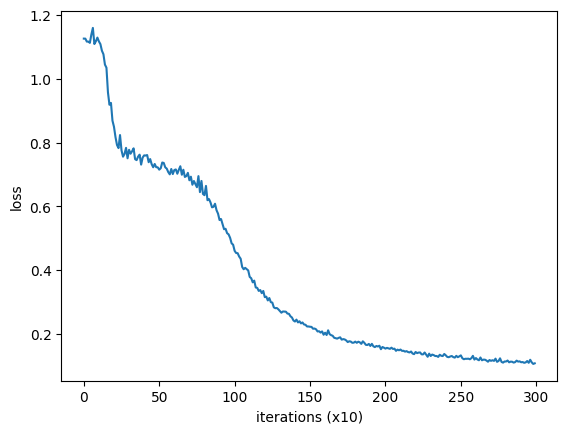

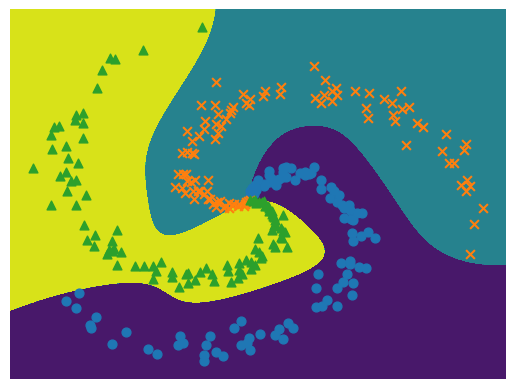

In [18]:
import sys
sys.path.append('..')  # 为了引入父目录的文件而进行的设定
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet


# 设定超参数
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学习用的变量
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # 打乱数据
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 计算梯度，更新参数
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 定期输出学习过程
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| epoch %d |  iter %d / %d | loss %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0


# 绘制学习结果
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

# 绘制决策边界
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 绘制数据点
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

## Trainer类
如前所述，本书中有很多机会执行神经网络的学习。为此，就需要编写前面那样的学习用的代码。然而，每次都写相同的代码太无聊了，因此我们将进行学习的类作为 `Trainer` 类提供出来。`Trainer` 类的内部实现和刚才的源代码几乎相同，只是添加了一些新的功能而已，我们在需要的时候再详细说明其用法。

`Trainer` 类的代码在 `common/trainer.py` 中。这个类的初始化程序接收神经网络（模型）和优化器，具体如下所示。

```python
model = TwoLayerNet(...)
optimizer = SGD(lr=1.0)
trainer = Trainer(model, optimizer)
```

然后，调用 `fit()` 方法开始学习。`fit()` 方法的参数如表 1-1 所示。

**表1-1 Trainer类的fit()方法的参数。表中的"(=XX)"表示参数的默认值**

| 参数            | 说明 |
|-----------------|------|
| x               | 输入数据 |
| t               | 监督标签 |
| max_epoch (= 10) | 进行学习的 epoch 数 |
| batch_size (= 32) | mini-batch 的大小 |
| eval_interval (= 20) | 输出结果（平均损失等）的间隔。例如设置 `eval_interval=20`，则每 20 次迭代计算 1 次平均损失，并将结果输出到界面上 |
| max_grad (= None) | 梯度的最大范数。当梯度的范数超过这个值时，缩小梯度（梯度裁剪，具体请参考第 5 章） |

另外，`Trainer` 类有 `plot()` 方法，它将 `fit()` 方法记录的损失（准确地说，是按照 `eval_interval` 评价的平均损失）在图上画出来。使用 `Trainer` 类进行学习的代码如下所示。

| epoch 1 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 2 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 3 |  iter 1 / 10 | time 0[s] | loss 1.13
| epoch 4 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 5 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 6 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 7 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 8 |  iter 1 / 10 | time 0[s] | loss 1.16
| epoch 9 |  iter 1 / 10 | time 0[s] | loss 1.11
| epoch 10 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 11 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 12 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 13 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 14 |  iter 1 / 10 | time 0[s] | loss 1.09
| epoch 15 |  iter 1 / 10 | time 0[s] | loss 1.08
| epoch 16 |  iter 1 / 10 | time 0[s] | loss 1.04
| epoch 17 |  iter 1 / 10 | time 0[s] | loss 1.03
| epoch 18 |  iter 1 / 10 | time 0[s] | loss 0.94
| epoch 19 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 20 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 2

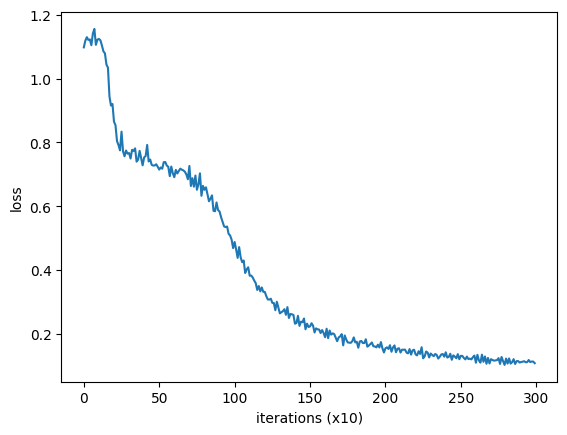

In [19]:
import sys
sys.path.append('..')  # 为了引入父目录的文件而进行的设定
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet


# 设定超参数
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

执行这段代码，会进行和之前一样的神经网络的学习。通过将之前展示的学习用的代码交给 Trainer 类负责，代码变简洁了。本书今后都将使用 ``Trainer`` 类进行学习。

## 小结 
- 神经网络具有输入层、隐藏层和输出层
- 通过全连接层进行线性变换，通过激活函数进行非线性变换
- 全连接层和 mini-batch 处理都可以写成矩阵计算
- 使用误差反向传播法可以高效地求解神经网络的损失的梯度
- 使用计算图能够将神经网络中发生的处理可视化，这有助于理解正向传播和反向传播
- 在神经网络的实现中，通过将组件模块化为层，可以简化实现
- 数据的位精度和 GPU 并行计算对神经网络的高速化非常重要